In [1]:
import pylab as pl
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.optimize as opt
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import randint
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_csv('/content/drive/MyDrive/data/heartfinal.csv')


**All Columns Explations**
age: age of the patient
sex : sex of the patient
cp : chest pain type
0 = typical angina
1 = atypical angina
2 = non-anginal pain
3 = asymptomatic

trtbps : resting blood pressure in mm Hg
chol : cholestoral in mg/dl
exng : exercise induced angina
1 = yes
0 = no

fbs : fasting blood sugar > 120 mg/dl
1 = true
0 = false

restecg : resting electrocardiographic results
0 = normal
1 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
2 = showing probable or definite left ventricular hypertrophy by Estes' criteria

thalachh : maximum heart rate achieved
slp : slope
caa : number of major vessels
thall : thalium stress test result
target :
0 = less chance of heart attack
1 = more chance of heart attack

In [6]:
df.head()

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,74,1,1,133,190,0,1,122,0,0.798688,0,2,1,0
1,1,70,1,0,128,153,1,0,136,1,0.302304,0,0,1,0
2,2,74,0,0,145,193,1,1,143,0,0.876646,0,2,1,0
3,3,74,0,1,124,165,0,1,131,1,1.615372,0,1,2,0
4,4,71,1,0,123,179,1,1,142,1,2.599606,0,0,1,0


In [7]:
df.columns

Index(['index', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     752 non-null    int64  
 1   age       752 non-null    int64  
 2   sex       752 non-null    int64  
 3   cp        752 non-null    int64  
 4   trestbps  752 non-null    int64  
 5   chol      752 non-null    int64  
 6   fbs       752 non-null    int64  
 7   restecg   752 non-null    int64  
 8   thalach   752 non-null    int64  
 9   exang     752 non-null    int64  
 10  oldpeak   752 non-null    float64
 11  slope     752 non-null    int64  
 12  ca        752 non-null    int64  
 13  thal      752 non-null    int64  
 14  target    752 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 88.2 KB


In [9]:
# from the data understanding we got
categoric_cols = ['sex', 'cp', 'fbs', 'restecg', 
                  'exang', 'slope', 'ca', 'thal']

In [10]:
for i in categoric_cols:
     print('all value in column {0} : \n{1} '.format(i, df[i].value_counts().sort_index()))
     print('\n')

all value in column sex : 
0    324
1    428
Name: sex, dtype: int64 


all value in column cp : 
0    383
1    260
2     86
3     23
Name: cp, dtype: int64 


all value in column fbs : 
0    494
1    258
Name: fbs, dtype: int64 


all value in column restecg : 
0    369
1    379
2      4
Name: restecg, dtype: int64 


all value in column exang : 
0    435
1    317
Name: exang, dtype: int64 


all value in column slope : 
0    471
1    140
2    141
Name: slope, dtype: int64 


all value in column ca : 
0    326
1    213
2    189
3     20
4      4
Name: ca, dtype: int64 


all value in column thal : 
0    157
1    173
2    305
3    117
Name: thal, dtype: int64 




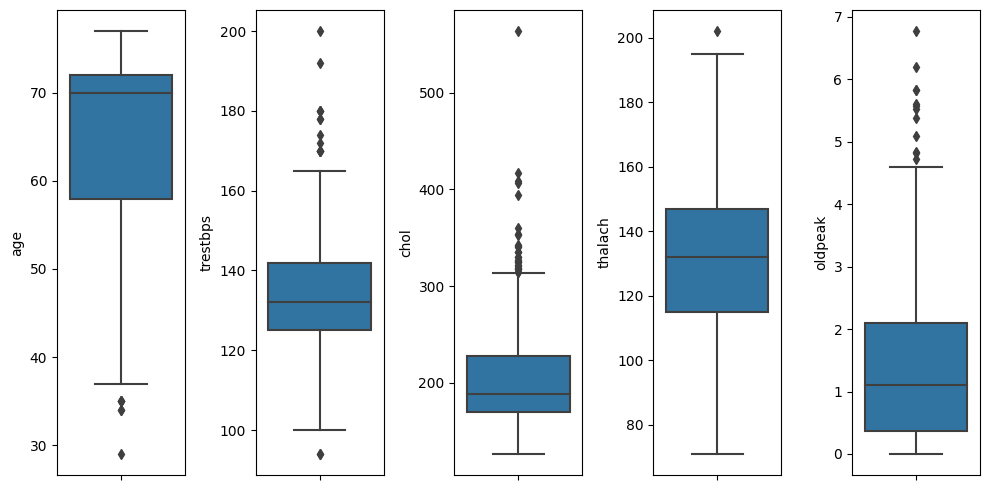

In [11]:
col_num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y= df[col_num[i]])
    plt.tight_layout()

In [12]:
for i in col_num:
    Q1 = df[i].quantile(0.25) 
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1 
    LowerBound = Q1 - (1.5 * IQR) 
    UpperBound = Q3 + (1.5 * IQR) 
    
    df = df[(df[i] >= LowerBound)&(df[i] <= UpperBound)]

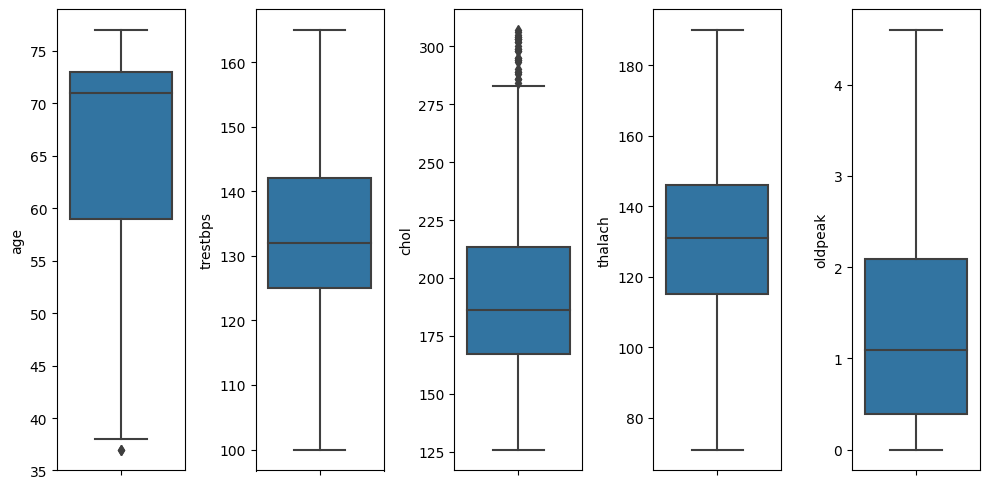

In [13]:
col_num = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(10,5))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y = df[col_num[i]])
    plt.tight_layout()

In [14]:
df.shape

(687, 15)

missing value in data

In [15]:
df.isna().sum()


index       0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

dulicate data

In [16]:
df.duplicated().sum()

0

exploratory data analysis__

In [17]:
df[col_num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,687.0,65.774381,9.895079,37.0,59.000000,71.000000,73.00000,77.000000
trestbps,687.0,132.813683,11.613814,100.0,125.000000,132.000000,142.00000,165.000000
chol,687.0,196.181951,38.842702,126.0,167.000000,186.000000,213.50000,307.000000
thalach,687.0,132.563319,21.752819,71.0,115.000000,131.000000,146.00000,190.000000
oldpeak,687.0,1.323173,1.111706,0.0,0.385678,1.090448,2.09047,4.600619


count plot

In [18]:
df.columns

Index(['index', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [19]:
count = ['sex', 'cp', 'fbs', 'restecg','exang','slope', 'ca', 'thal']

In [22]:
#for i in count:
 #   sns.countplot(df[i], palette = 'viridis')
  #  plt.show()

histogram

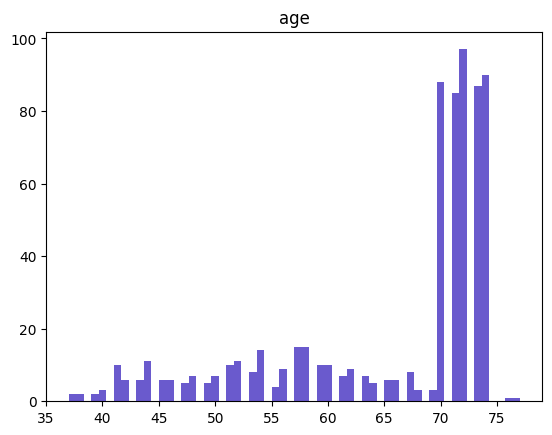

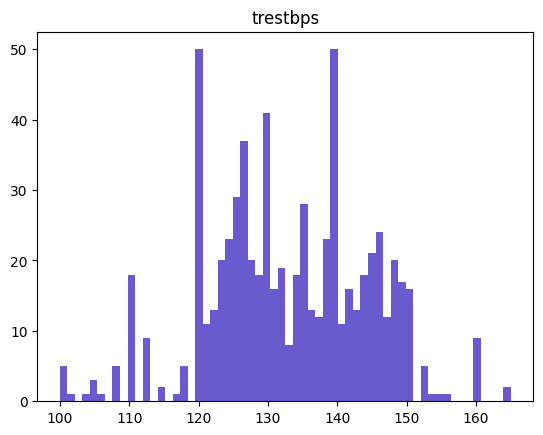

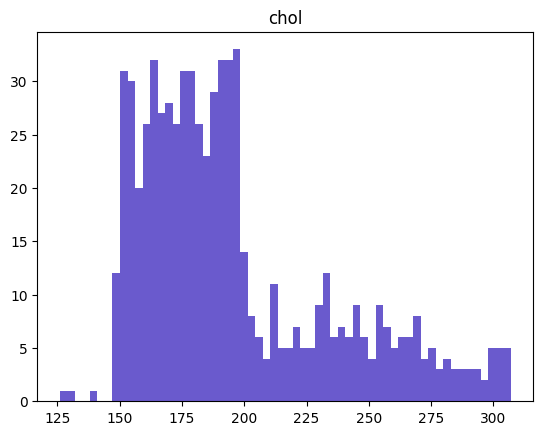

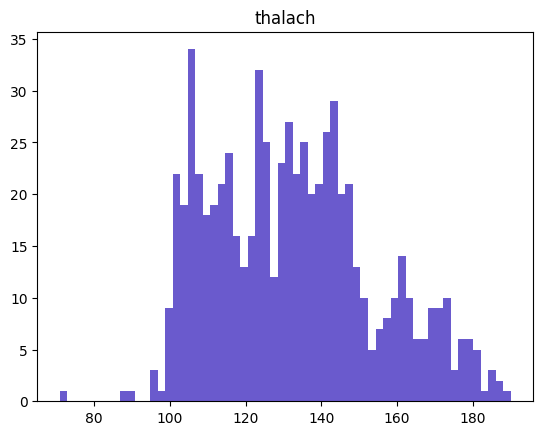

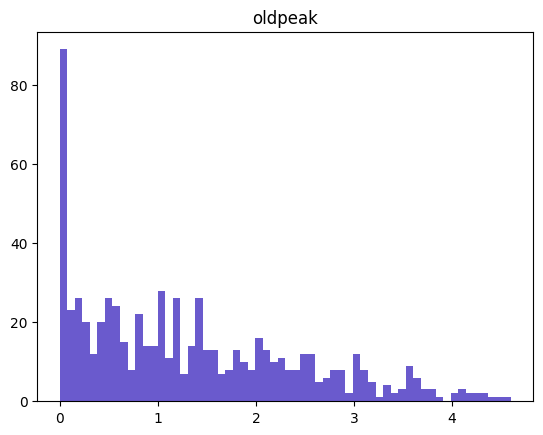

In [21]:
i = ['age', 'trestbps', 'chol','thalach','oldpeak']
for j in i:
    plt.hist(df[j],bins = 60, color = 'slateblue')
    plt.title(j)
    plt.show()

In [23]:
df.columns

Index(['index', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [24]:
df.values

array([[  0.,  74.,   1., ...,   2.,   1.,   0.],
       [  1.,  70.,   1., ...,   0.,   1.,   0.],
       [  2.,  74.,   0., ...,   2.,   1.,   0.],
       ...,
       [300.,  68.,   1., ...,   2.,   3.,   0.],
       [301.,  57.,   1., ...,   1.,   3.,   0.],
       [302.,  57.,   0., ...,   1.,   2.,   0.]])

checking for multicollinearity__ / featureselection

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
4,trestbps,121.621181
1,age,90.520229
8,thalach,50.965919
5,chol,45.981098
11,slope,5.956048
13,thal,5.104429
0,index,4.617176
14,target,3.727348
10,oldpeak,2.891399
2,sex,2.539245


In [ ]:
# drop column 'thalachh' (vif > 11)
df.drop(columns = ['thalach'], inplace = True)

In [26]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False)


,feature,VIF
4,trestbps,121.621181
1,age,90.520229
8,thalach,50.965919
5,chol,45.981098
11,slope,5.956048
13,thal,5.104429
0,index,4.617176
14,target,3.727348
10,oldpeak,2.891399
2,sex,2.539245


In [27]:
# drop column 'age' (vif > 11)
df.drop(columns = ['age'], inplace = True)

In [28]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
3,trestbps,59.048449
7,thalach,49.680530
4,chol,45.174634
10,slope,5.003736
12,thal,4.977216
0,index,4.551726
13,target,3.698584
9,oldpeak,2.891144
1,sex,2.518867
11,ca,2.240485


In [29]:
# drop column 'chol' (vif > 11)
df.drop(columns = ['chol'], inplace = True)

In [30]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
6,thalach,46.473307
3,trestbps,45.740394
11,thal,4.758087
0,index,4.537358
9,slope,4.450034
12,target,3.675569
8,oldpeak,2.868169
1,sex,2.518742
10,ca,2.216502
2,cp,2.163268


In [31]:
# drop column 'chol' (vif > 11)
df.drop(columns = ['index'], inplace = True)

In [32]:
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
5,thalach,46.188881
2,trestbps,43.928060
10,thal,4.758061
8,slope,4.447909
11,target,3.265303
7,oldpeak,2.867075
0,sex,2.514834
9,ca,2.214604
1,cp,2.162916
4,restecg,2.037306


In [33]:

df.columns

Index(['sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Pearson Correlation,


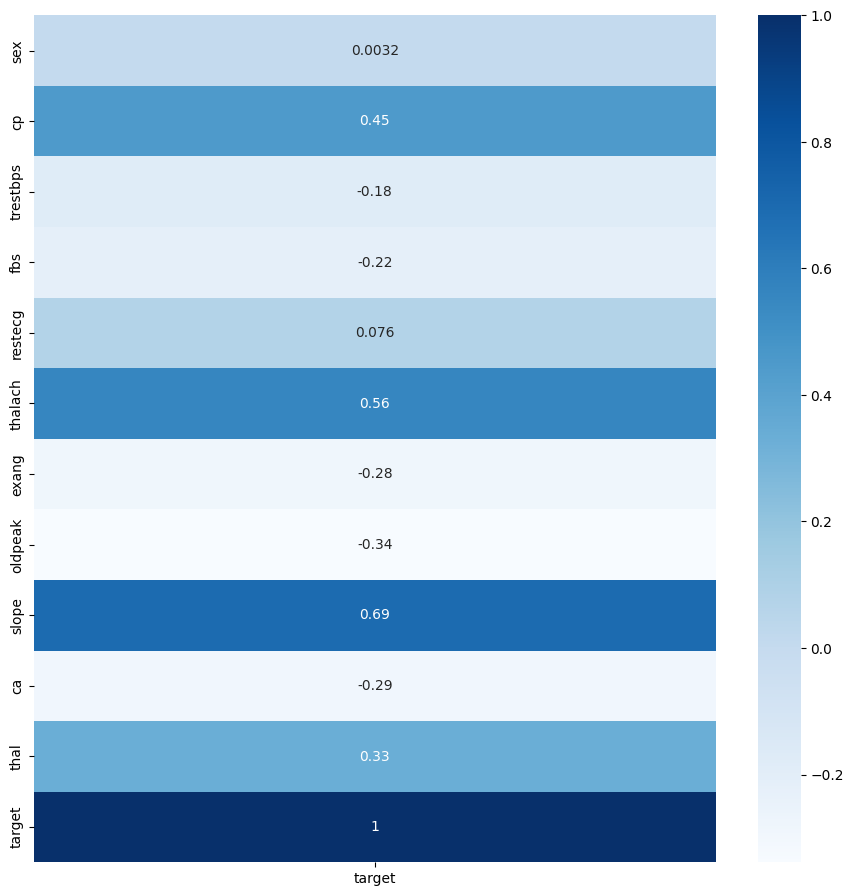

abs corr score: 
sex         0.003163
cp          0.447216
trestbps    0.178134
fbs         0.218154
restecg     0.076416
thalach     0.560238
exang       0.283072
oldpeak     0.338672
slope       0.694239
ca          0.290551
thal        0.331964
Name: target, dtype: float64


mean 0.3110743870714331


feature selection result: 
cp         0.447216
thalach    0.560238
oldpeak    0.338672
slope      0.694239
thal       0.331964
Name: target, dtype: float64


In [34]:
print('Pearson Correlation,')
plt.figure(figsize = (11,11))
cor = df.corr().iloc[:,-1:]
sns.heatmap(cor, annot = True, cmap = plt.cm.Blues)
plt.show()

print('abs corr score: ')
print(abs(cor['target'][0:-1]))
cor['target'] = cor['target'][0:-1]
margin = abs(cor['target'][0:-1]).mean()

print('\n')

print('mean {0}'.format(margin))

print('\n')

print('feature selection result: ')
fs = abs(cor['target'][0:-1])[abs(cor['target']) > margin]
print(fs)

In [36]:
df = df.drop(columns = ['sex', 'fbs', 'restecg', 'slope'])

In [35]:
df.columns

Index(['sex', 'cp', 'trestbps', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [37]:
df.head()

,cp,trestbps,thalach,exang,oldpeak,ca,thal,target
0,1,133,122,0,0.798688,2,1,0
1,0,128,136,1,0.302304,0,1,0
2,0,145,143,0,0.876646,2,1,0
3,1,124,131,1,1.615372,1,2,0
4,0,123,142,1,2.599606,0,1,0


train test split__

In [38]:
X = df.drop(columns=['target'])
y = df['target']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

hypertuning__

In [39]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

model_params = {
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params' : {
            'penalty':['l1', 'l2', 'elasticnet', 'none'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class': ['auto', 'ovr', 'multinomial'],
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'splitter':['best','random'],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6,7,8],
            'criterion' :['gini', 'entropy']
        }
    },
    'SVM_Classifier':{
        'model' : SVC(),
        'params':{
            'kernel' : ['rbf','poly','sigmoid','linear'],
            'gamma' : ['scale','auto'],
        }
    }
    }
scores = []

from sklearn.model_selection import GridSearchCV
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train,y_train) 
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
best = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best

,model,best_score,best_params
0,Logistic_Regression,0.916211,"{'multi_class': 'auto', 'penalty': 'l2', 'solv..."
1,decision_tree,0.919854,"{'criterion': 'gini', 'max_depth': 6, 'max_fea..."
2,SVM_Classifier,0.918033,"{'gamma': 'scale', 'kernel': 'linear'}"


modelling__

1 Logistic Regression


In [40]:
best.best_params[0]


{'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}

In [41]:
model = LogisticRegression(solver = 'saga',
                           penalty = 'l1', 
                           multi_class = 'auto')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

evaluation

[[103   4]
 [ 15  16]]


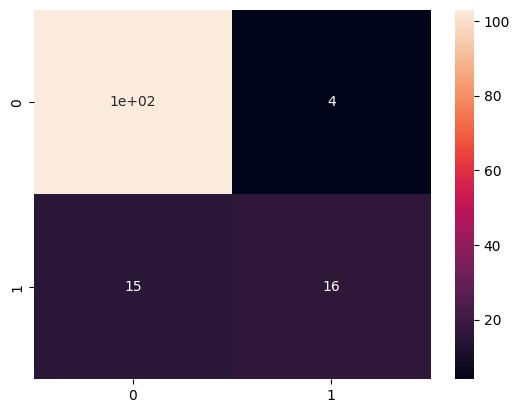



Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       107
           1       0.80      0.52      0.63        31

    accuracy                           0.86       138
   macro avg       0.84      0.74      0.77       138
weighted avg       0.86      0.86      0.85       138



In [42]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
plt.show()

from sklearn.metrics import classification_report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_predict))

2 Decision Tree

In [43]:
best.best_params[1]

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'splitter': 'best'}

In [44]:
model = DecisionTreeClassifier(criterion = 'gini',
                               max_depth = 5,
                               max_features = 'log2',
                               splitter = 'best')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

evaluation

[[104   3]
 [ 12  19]]


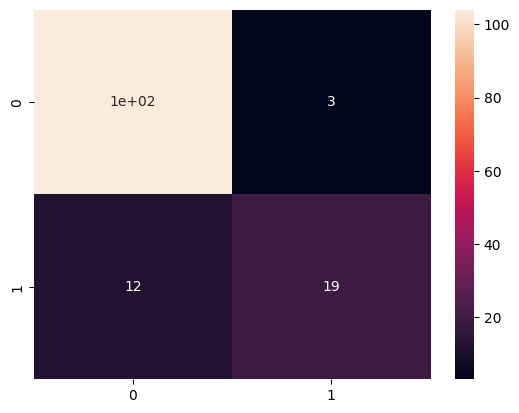



Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       107
           1       0.86      0.61      0.72        31

    accuracy                           0.89       138
   macro avg       0.88      0.79      0.82       138
weighted avg       0.89      0.89      0.88       138



In [45]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
plt.show()

from sklearn.metrics import classification_report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_predict))

3 SVM

In [46]:
best.best_params[2]

{'gamma': 'scale', 'kernel': 'linear'}

In [47]:
model = SVC(gamma = 'auto', kernel = 'rbf')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

evaluation

[[106   1]
 [ 24   7]]


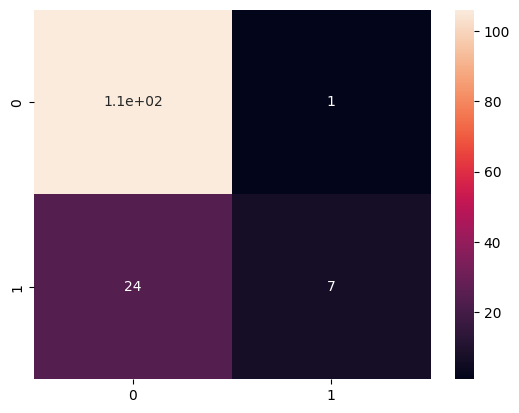



Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.99      0.89       107
           1       0.88      0.23      0.36        31

    accuracy                           0.82       138
   macro avg       0.85      0.61      0.63       138
weighted avg       0.83      0.82      0.77       138



In [48]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
plt.show()

from sklearn.metrics import classification_report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_predict))